In [23]:
import numpy as np 
import pandas as pd 
import sklearn 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
#import matplotlib.pyplot as plt3D
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)
from sklearn import decomposition
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn_extra.cluster import KMedoids


In [24]:
# data = pd.read_csv("/Users/anis/test_labnbook/test_3_indicateurs/traces_collaboration_fil_rouge/tmp/collab_fil_rouge.csv")
# colab_Anis= pd.read_csv("/Users/anis/test_labnbook/test_3_indicateurs/traces_collaboration_Anis/tmp/collab_Anis.csv")['indice_collab']
# contrib= pd.read_csv("/Users/anis/test_labnbook/test_3_indicateurs/traces_contribution/tmp/Contribution.csv")['indice_collab']
# data.insert(7,'indice_collab_Anis', colab_Anis)
# data.insert(8, 'indice_contrib', contrib)
data = pd.read_csv(
    '/Users/anis/test_labnbook/test_3_indicateurs/comparaison/comparaison.csv')
#Enlever les labdocs avec un seul user
#data = data.drop(data[data['n_users'] == 1].index)
data = data.drop("Unnamed: 0",axis=1)
data.head()


,id_mission,id_report,id_labdoc,id_trace,n_users,n_mots,indice_collab,indice_collab_Anis,indice_contrib
0,1646,45234,445103,7475368,1,465,0.0,0.0,0.0
1,1646,45234,445103,7522660,1,616,0.0,0.0,0.0
2,1646,45234,445103,7647185,1,804,0.0,0.0,0.0
3,1646,45234,445103,7648145,1,804,0.0,0.0,0.0
4,1646,45234,445102,7477023,1,182,0.0,0.0,0.0


# ACP
 * Prendre la dernière trace de chaque Labdoc

In [25]:
print(" L'index de la dernière trace de chaque labdoc")
idx_labdocs = data['id_labdoc'].diff()[data['id_labdoc'].diff() != 0].index.values
idx_labdocs = np.delete(idx_labdocs, 0) - 1 
df = data[data.index.isin(idx_labdocs)]

print("Convertir les variables qualitatives en string")
df.id_mission = df.id_mission.astype(str)
df.id_report = df.id_report.astype(str)
df.id_trace = df.id_trace.astype(str)
df.id_labdoc = df.id_labdoc.astype(str)
display(df.head())

#Je stock l'id_mission dans une variable
#display(sns.pairplot(df, hue='id_mission'))

print(" Enlever certaines colonnes")
df = df.drop(['id_report', 'id_trace', 'indice_collab'], axis=1)
display(df.head(),df.describe() ,df.info())


 L'index de la dernière trace de chaque labdoc
Convertir les variables qualitatives en string


/Users/anis/miniforge3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,id_mission,id_report,id_labdoc,id_trace,n_users,n_mots,indice_collab,indice_collab_Anis,indice_contrib
3,1646,45234,445103,7648145,1,804,0.000000,0.000000,0.000000
9,1646,45234,445102,7630378,2,205,0.716814,0.612223,0.450084
16,1646,45234,445109,7650450,2,449,0.430657,0.222636,0.820115
32,1646,45234,445100,7650537,1,408,0.000000,0.000000,0.000000
50,1646,45234,445108,7779099,2,661,0.590444,0.375491,0.620270


 Enlever certaines colonnes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 980 entries, 3 to 4001
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_mission          980 non-null    object 
 1   id_labdoc           980 non-null    object 
 2   n_users             980 non-null    int64  
 3   n_mots              980 non-null    int64  
 4   indice_collab_Anis  980 non-null    float64
 5   indice_contrib      980 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 53.6+ KB


,id_mission,id_labdoc,n_users,n_mots,indice_collab_Anis,indice_contrib
3,1646,445103,1,804,0.000000,0.000000
9,1646,445102,2,205,0.612223,0.450084
16,1646,445109,2,449,0.222636,0.820115
32,1646,445100,1,408,0.000000,0.000000
50,1646,445108,2,661,0.375491,0.620270


,n_users,n_mots,indice_collab_Anis,indice_contrib
count,980.000000,980.000000,980.000000,980.000000
mean,1.533673,126.582653,0.142578,0.220229
std,0.674873,144.503808,0.224653,0.303831
min,1.000000,1.000000,0.000000,0.000000
25%,1.000000,33.000000,0.000000,0.000000
50%,1.000000,76.000000,0.000000,0.000000
75%,2.000000,156.250000,0.252448,0.471903
max,4.000000,1157.000000,0.977910,0.998042


None

In [26]:
# Je met l'id_labdoc  dans les lignes 
y = df['id_labdoc']
# Je vais enlever l'id_mission car selon moi c'est une variables qualitative qui ne peut pas intervenir dans l'ACP
X = df.drop(['id_mission','id_labdoc'],axis=1)
X.index = np.array(y)
X.head()

,n_users,n_mots,indice_collab_Anis,indice_contrib
445103,1,804,0.000000,0.000000
445102,2,205,0.612223,0.450084
445109,2,449,0.222636,0.820115
445100,1,408,0.000000,0.000000
445108,2,661,0.375491,0.620270


In [27]:
X.describe()

,n_users,n_mots,indice_collab_Anis,indice_contrib
count,980.000000,980.000000,980.000000,980.000000
mean,1.533673,126.582653,0.142578,0.220229
std,0.674873,144.503808,0.224653,0.303831
min,1.000000,1.000000,0.000000,0.000000
25%,1.000000,33.000000,0.000000,0.000000
50%,1.000000,76.000000,0.000000,0.000000
75%,2.000000,156.250000,0.252448,0.471903
max,4.000000,1157.000000,0.977910,0.998042


<AxesSubplot:>

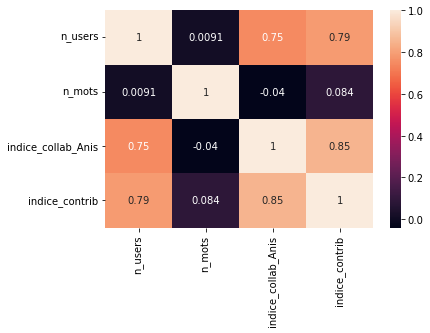

In [28]:
sns.heatmap(X.corr(), annot=True)

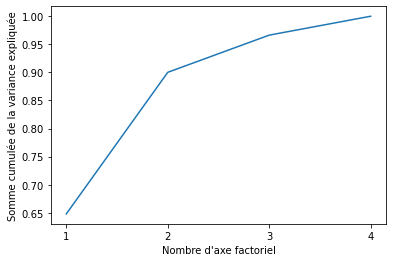

In [29]:
# centrer et réduire les données
n, p = X.shape
X_std = StandardScaler().fit_transform(X)
n_components = 4
pca = decomposition.PCA(n_components)
X_projected = pca.fit_transform(X_std)
plt.plot(np.arange(1,p+1),np.cumsum(pca.explained_variance_ratio_))
plt.xticks(np.arange(1, p+1))
plt.xlabel("Nombre d'axe factoriel")
plt.ylabel('Somme cumulée de la variance expliquée')
plt.show()

On pourrait éventuellement ne prendre que les 2 premier axes factoriel car il représentent 93 %. Mais, pour l'instant, je vais les prendre tous 

In [30]:
X_projected = pd.DataFrame(X_projected, index=X.index, columns=[
                           "F" + str(i+1) for i in range(n_components)])
display(X_projected)
display("F1 = {}".format(pca.components_[0]), "F2 = {}".format(pca.components_[1]), X.columns)

,F1,F2,F3,F4
445103,-1.149039,4.684802,-0.161914,-0.509842
445102,2.057266,0.409118,-0.733633,-0.884591
445109,1.803099,2.304140,-0.163271,0.950679
445100,-1.202522,1.957662,-0.137691,-0.232734
445108,1.838339,3.668471,-0.358615,-0.121815
...,...,...,...,...
454203,-1.244660,-0.190994,-0.118605,-0.014406
454202,1.029782,-0.693122,0.079207,-0.218477
442482,-1.238177,0.139568,-0.121542,-0.047995
442471,-1.249522,-0.438916,-0.116403,0.010786


'F1 = [0.56309093 0.01950641 0.57921235 0.58911897]'

'F2 = [-0.01949525  0.99464906 -0.07912809  0.06349742]'

Index(['n_users', 'n_mots', 'indice_collab_Anis', 'indice_contrib'], dtype='object')

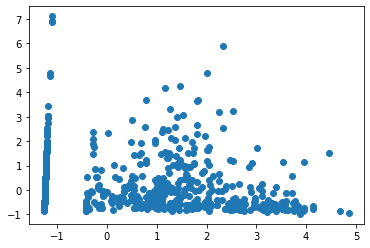

In [31]:
plt.scatter(X_projected['F1'], X_projected['F2'])


* Rappelons-nous l’objectif est d'étudier les liaisons entre les variables. On va donc chercher à savoir s’il y a des groupes de variables qui sont fortement corrélées entre elles(deux à deux).
* Si de tels groupes existent, alors toutes les variables d’un groupe donné seront «synthétisables» (résumables) par une variable synthétique.
* Ces variables synthétiques sont en fait les composantes principales PC1 , PC2 .. etc.


In [32]:
# Ici je vais enlever les labdocs avec un seul étudiant
X = X.drop(X[X['n_users'] == 1].index)
display(X.head(), X.describe())


,n_users,n_mots,indice_collab_Anis,indice_contrib
445102,2,205,0.612223,0.450084
445109,2,449,0.222636,0.820115
445108,2,661,0.375491,0.620270
445104,2,261,0.137863,0.187721
445105,2,340,0.159027,0.628639


,n_users,n_mots,indice_collab_Anis,indice_contrib
count,428.000000,428.000000,428.000000,428.000000
mean,2.221963,138.161215,0.326463,0.504263
std,0.448556,151.755935,0.235670,0.260936
min,2.000000,3.000000,0.000000,0.000000
25%,2.000000,36.000000,0.140912,0.342545
50%,2.000000,74.500000,0.296253,0.494007
75%,2.000000,183.000000,0.476844,0.713593
max,4.000000,978.000000,0.977910,0.998042


<AxesSubplot:>

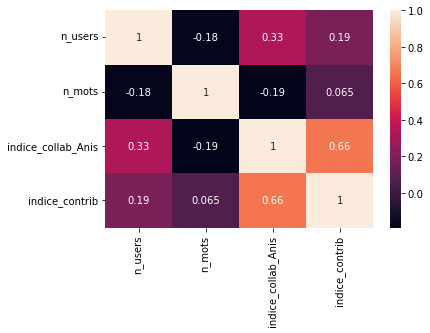

In [33]:
sns.heatmap(X.corr(), annot=True)

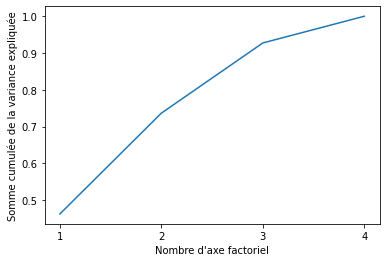

In [34]:
X_std = StandardScaler().fit_transform(X)
n_components = 4
pca = decomposition.PCA(n_components)
X_projected = pca.fit_transform(X_std)
plt.plot(np.arange(1, p+1), np.cumsum(pca.explained_variance_ratio_))
plt.xticks(np.arange(1, p+1))
plt.xlabel("Nombre d'axe factoriel")
plt.ylabel('Somme cumulée de la variance expliquée')
plt.show()


In [35]:
X_projected = pd.DataFrame(X_projected, index=X.index, columns=[
                           "F" + str(i+1) for i in range(n_components)])
#display(X_projected)
display("F1 = {}".format(pca.components_[0]), "F2 = {}".format(
    pca.components_[1]), X.columns)


'F1 = [ 0.4240921  -0.19151179  0.66096583  0.58872175]'

'F2 = [-0.37212603  0.81546703  0.08803998  0.43449362]'

Index(['n_users', 'n_mots', 'indice_collab_Anis', 'indice_contrib'], dtype='object')

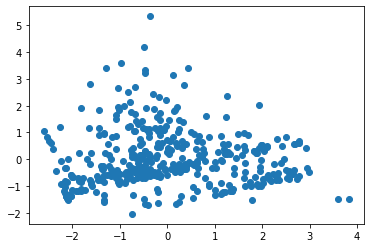

In [36]:
plt.scatter(X_projected['F1'], X_projected['F2'] )

# Clustering avec k-means

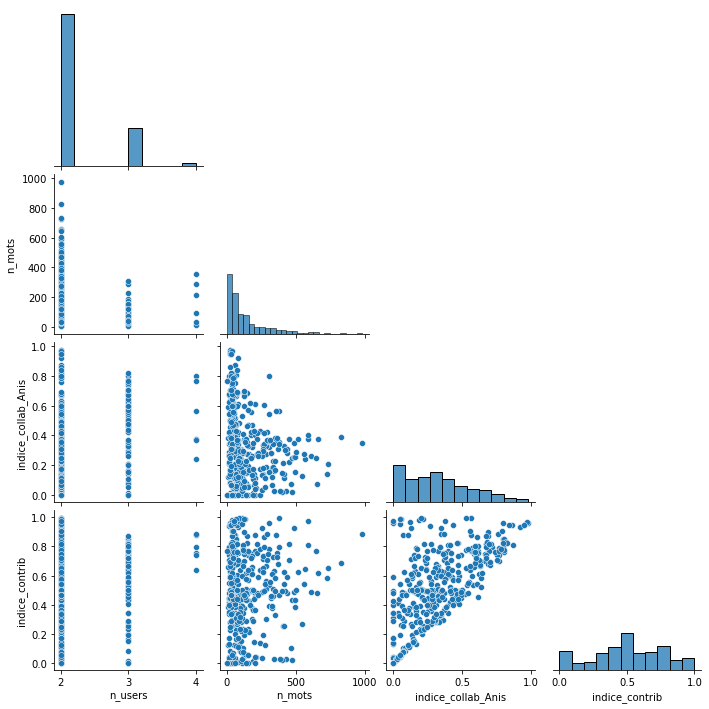

In [37]:
sns.pairplot(X, corner=True)

<AxesSubplot:>

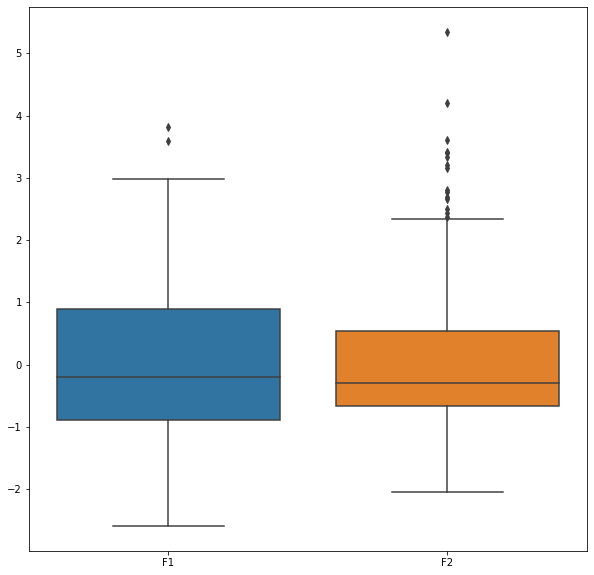

In [38]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=X_projected[["F1", "F2"]],  orient='v')


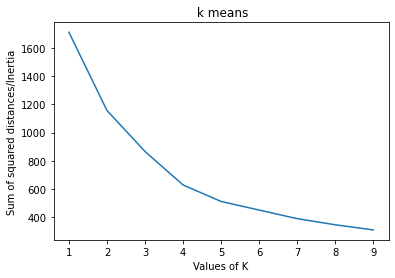

In [49]:
#data = pd.DataFrame(X_std, columns=X.columns)
#data = X
data = X_projected[["F1", "F2",'F3','F4']]

Sum_of_squared_distances = []
K = range(1, 10)
for num_clusters in K:
 model = KMeans(n_clusters=num_clusters)
 model.fit(data)
 Sum_of_squared_distances.append(model.inertia_)
plt.plot(K, Sum_of_squared_distances)
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title(' k means')
plt.show()


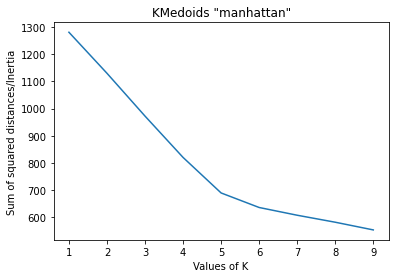

In [50]:
#data = X
Sum_of_squared_distances = []
K = range(1, 10)
for num_clusters in K:
 model = KMedoids(metric="manhattan",n_clusters=num_clusters)
 model.fit(data)
 Sum_of_squared_distances.append(model.inertia_)
plt.plot(K, Sum_of_squared_distances)
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('KMedoids "manhattan"')
plt.show()


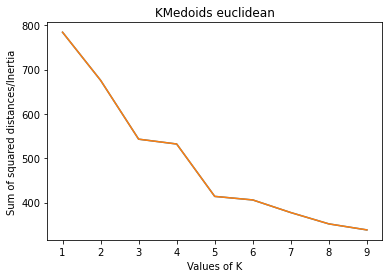

In [51]:
#data = X
Sum_of_squared_distances = []
K = range(1, 10)
for num_clusters in K:
 model = KMedoids(metric="euclidean", n_clusters=num_clusters)
 model.fit(data)
 Sum_of_squared_distances.append(model.inertia_)
plt.plot(K, Sum_of_squared_distances)
plt.plot(K, Sum_of_squared_distances)
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title("KMedoids euclidean")
plt.show()


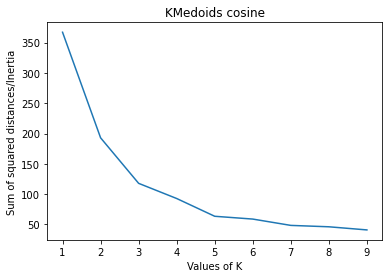

In [52]:
#data = X
Sum_of_squared_distances = []
K = range(1, 10)
for num_clusters in K:
 model = KMedoids(metric="cosine",  n_clusters=num_clusters)
 model.fit(data)
 Sum_of_squared_distances.append(model.inertia_)
plt.plot(K, Sum_of_squared_distances)

plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title("KMedoids cosine")
plt.show()


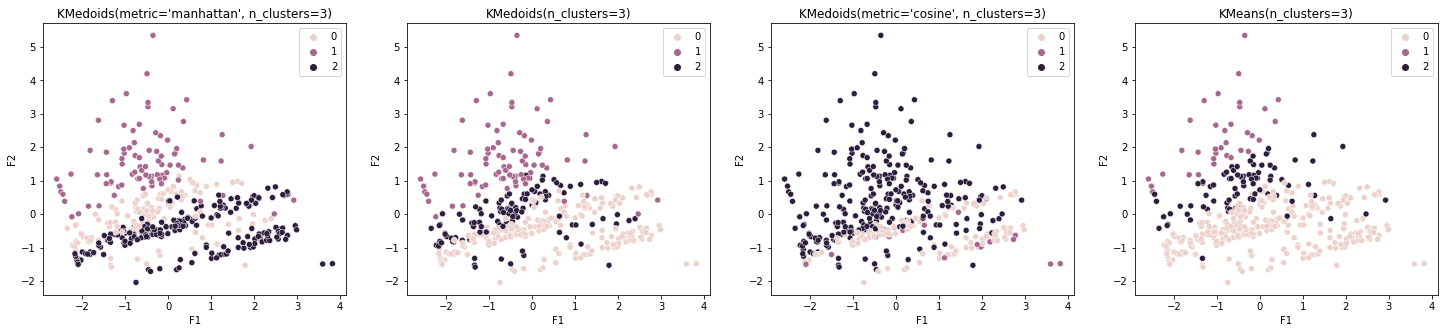

In [54]:
 fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(25, 5))

n_clusters = 3
selected_models = [
     (
         KMedoids(metric="manhattan", n_clusters=n_clusters),
         "KMedoids (manhattan)",
     ),
     (
         KMedoids(metric="euclidean", n_clusters=n_clusters),
         "KMedoids (euclidean)",
     ),
     (KMedoids(metric="cosine", n_clusters=n_clusters), "KMedoids (cosine)"),
     (KMeans(n_clusters=n_clusters), "KMeans"),
 ]
for  i, (model, description) in enumerate(selected_models):
     model.fit(X)
     labels = model.labels_
     sns.scatterplot(x=data['F1'], y=data['F2'], hue=labels, ax=ax[i])
     ax[i].set_title(model)



In [55]:
KMeans(n_clusters=n_clusters).fit(data)
X["labels"] = labels

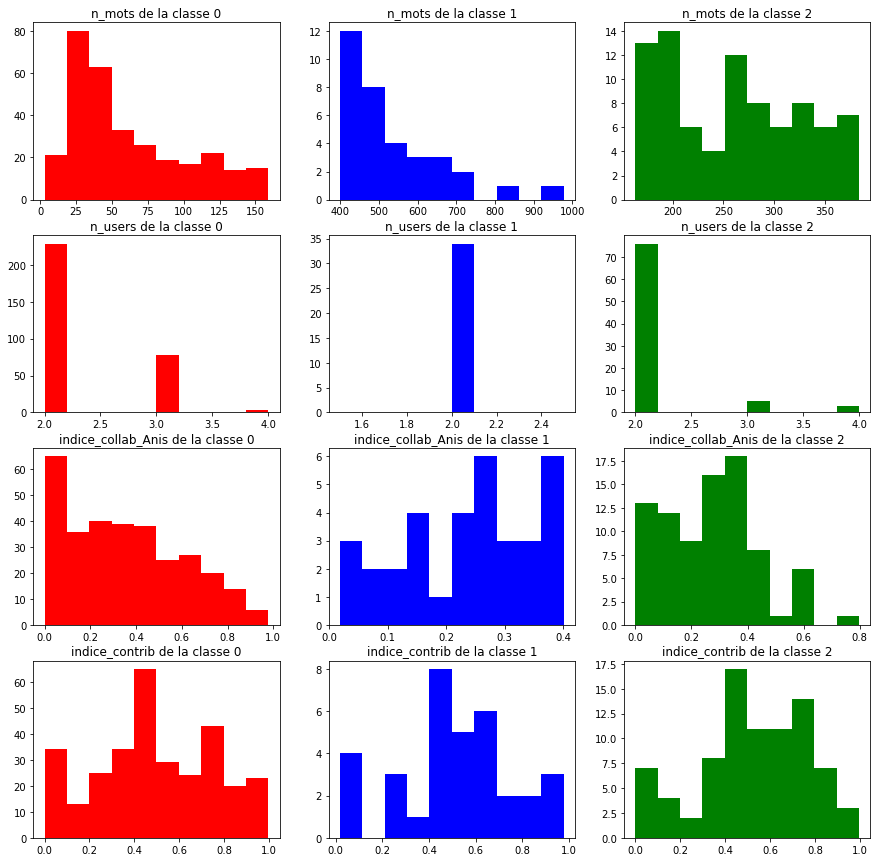

In [56]:
fig, ax = plt.subplots(4, 3, figsize=(15, 15))

# Histogrammes des mots par classe
ax[0, 0].set_title("n_mots de la classe {}".format(0))
ax[0,0].hist((X[X["labels"] == 0]).n_mots, color="r")

ax[0, 1].set_title("n_mots de la classe {}".format(1))
ax[0,1].hist((X[X["labels"] == 1]).n_mots, color="b")

ax[0, 2].set_title("n_mots de la classe {}".format(2))
ax[0, 2].hist((X[X["labels"] == 2]).n_mots, color="g")


# Histogrammes des user par classe
ax[1, 0].set_title("n_users de la classe {}".format(0))
ax[1, 0].hist((X[X["labels"] == 0]).n_users, color="r")

ax[1, 1].hist((X[X["labels"] == 1]).n_users, color="b")
ax[1, 1].set_title("n_users de la classe {}".format(1))

ax[1, 2].hist((X[X["labels"] == 2]).n_users, color="g")
ax[1, 2].set_title("n_users de la classe {}".format(2))

# Histogrammes des indice_collab_Anis par classe
ax[2, 0].set_title("indice_collab_Anis de la classe {}".format(0))
ax[2, 0].hist((X[X["labels"] == 0]).indice_collab_Anis, color="r")

ax[2, 1].set_title("indice_collab_Anis de la classe {}".format(1))
ax[2, 1].hist((X[X["labels"] == 1]).indice_collab_Anis, color="b")

ax[2, 2].set_title("indice_collab_Anis de la classe {}".format(2))
ax[2, 2].hist((X[X["labels"] == 2]).indice_collab_Anis, color="g")


# Histogrammes des indice_contrib par classe
ax[3, 0].set_title("indice_contrib de la classe {}".format(0))
ax[3, 0].hist((X[X["labels"] == 0]).indice_contrib, color="r")

ax[3, 1].set_title("indice_contrib de la classe {}".format(1))
ax[3, 1].hist((X[X["labels"] == 1]).indice_contrib, color="b")

ax[3, 2].set_title("indice_contrib de la classe {}".format(2))
ax[3, 2].hist((X[X["labels"] == 2]).indice_contrib, color="g")

plt.show()


## Commentaire 
* On remarque que le nombre de mots est une caractéristique de classe. En effet dans la classe 0 le nombre de mots est dans l'intervalle [170,400] et dans les intervalles [0,150] et [400,1000] pour, respectivement les classe 1 et 2



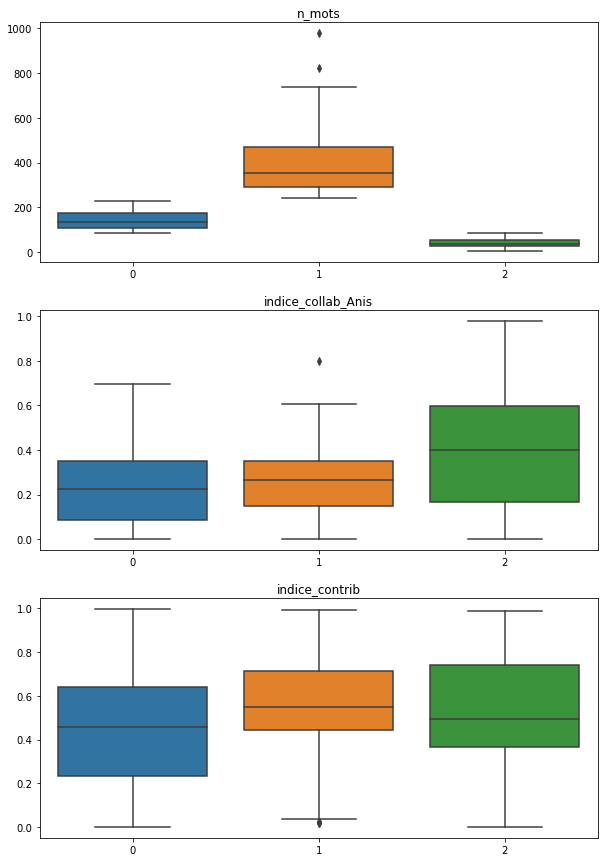

In [ ]:
# Pour variables on construit la boite a moustache de chaque classe 
fig, ax = plt.subplots(n_clusters, 1, figsize=(10, 15))

id_class = [X.loc[X["labels"] == 0].index, 
    X.loc[X["labels"] == 1].index, X.loc[X["labels"] == 2].index]
    
for i,var in enumerate(X.columns[1:-1]):
    sns.boxplot(data=[X[var].loc[id_class[j]] for j in range(
        n_clusters)], orient="v", ax=ax[i]).set_title(var)

plt.show()

# AgglomerativeClustering

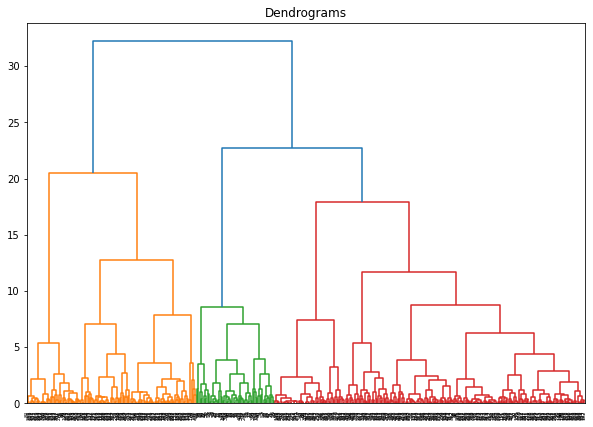

In [ ]:

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(X_std, method='ward'))


<AxesSubplot:xlabel='n_mots', ylabel='indice_collab_Anis'>

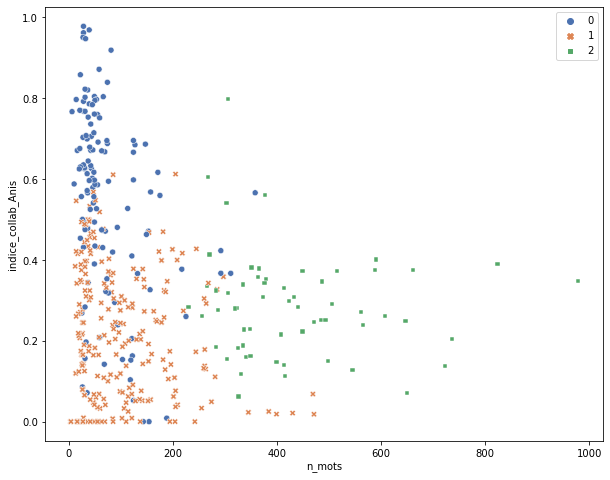

In [ ]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = 3
model = AgglomerativeClustering(
    n_clusters=n_clusters, affinity='euclidean', linkage='ward')
labels = model.fit_predict(data)
X["labels"]= labels 
#sns.scatterplot(x=data['F1'], y=data['F2'], hue=labels)

plt.figure( figsize=(10, 8))
sns.scatterplot(x=X['n_mots'], y=X['indice_collab_Anis'],
                hue=labels, style=labels, palette="deep")


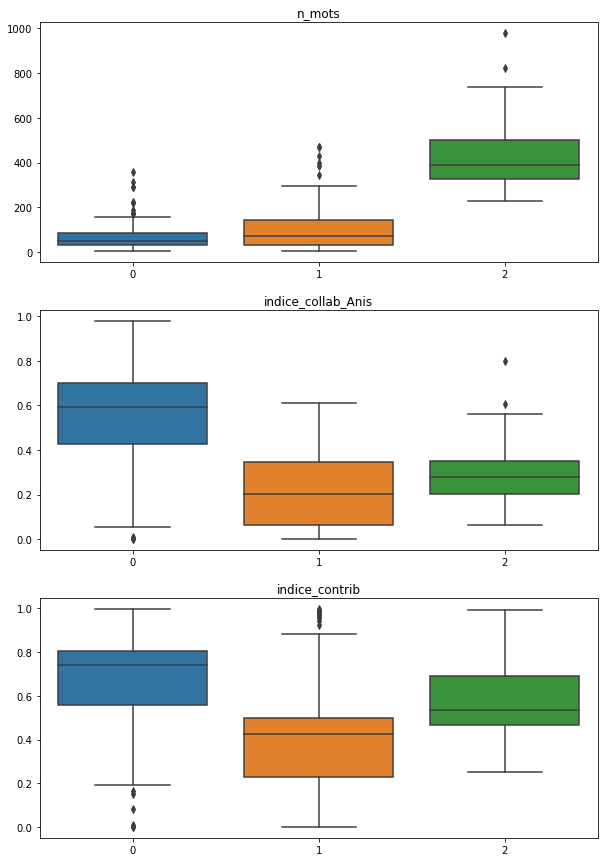

In [ ]:
# Pour variables on construit la boix a moustache de chaque classe
fig, ax = plt.subplots(n_clusters, 1, figsize=(10, 15))

id_class = [X.loc[X["labels"] == 0].index,
            X.loc[X["labels"] == 1].index, X.loc[X["labels"] == 2].index]

for i, var in enumerate(X.columns[1:-1]):
    sns.boxplot(data=[X[var].loc[id_class[j]] for j in range(
        n_clusters)], orient="v", ax=ax[i]).set_title(var)
plt.show()


In [ ]:
# plt.figure(figsize=(10, 15))
# fig, ax = plt.subplots(1, 4, figsize=(25, 5))
# for i,var in enumerate(X.columns[:-1]) : 
#     sns.kdeplot(X[var],ax=ax[i])


# DBSCAN

In [ ]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X_std, labels_true = make_blobs(
    n_samples=428, centers=centers, cluster_std=0.4, random_state=0
)

In [ ]:
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X_std)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" %
      metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print("Silhouette Coefficient: %0.3f" %
      metrics.silhouette_score(X_std, labels))


Estimated number of clusters: 4
Estimated number of noise points: 27
Homogeneity: 0.914
Completeness: 0.756
V-measure: 0.827
Adjusted Rand Index: 0.866
Adjusted Mutual Information: 0.826
Silhouette Coefficient: 0.468


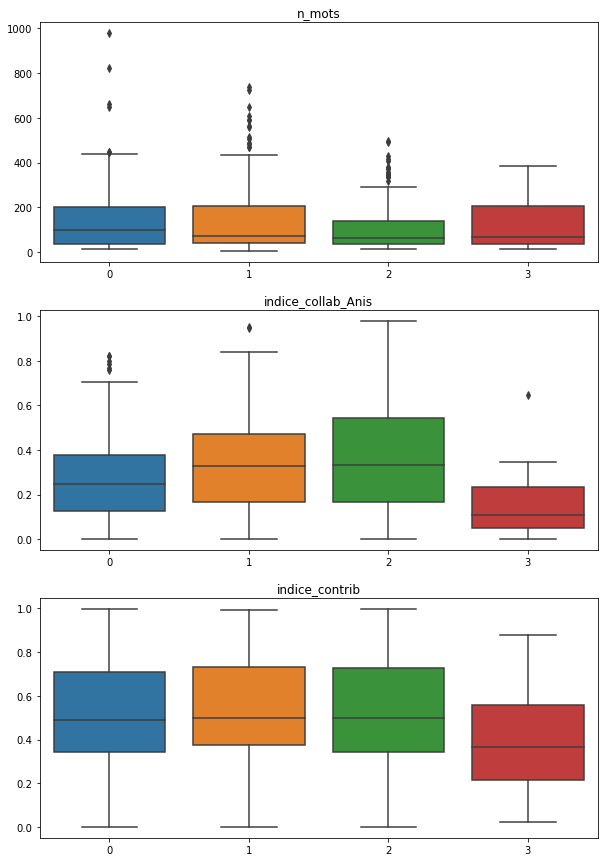

In [ ]:
# Pour variables on construit la boix a moustache de chaque classe
X["labels"]=labels
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# id_class = [X.loc[X["labels"] == 0].index,
#             X.loc[X["labels"] == 1].index, X.loc[X["labels"] == 2].index]
id_class = [X.loc[X["labels"] == i].index for i in range(n_clusters)]

for i, var in enumerate(X.columns[1:-1]):
    sns.boxplot(data=[X[var].loc[id_class[j]] for j in range(
        n_clusters)], orient="v", ax=ax[i]).set_title(var)
plt.show()


<AxesSubplot:xlabel='n_mots', ylabel='indice_collab_Anis'>

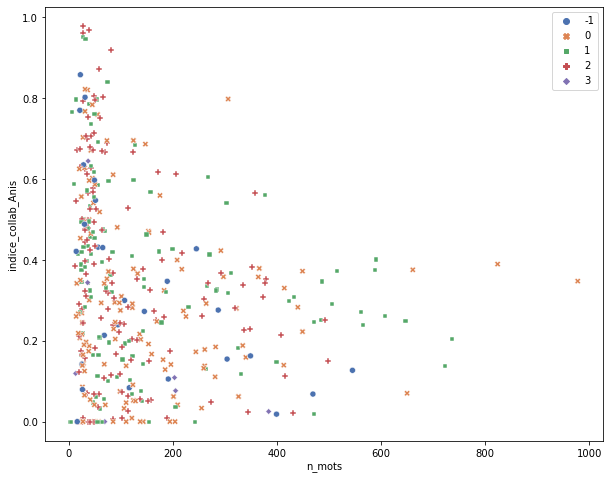

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X['n_mots'], y=X['indice_collab_Anis'],
                hue=labels, style=labels, palette="deep")



In [ ]:
#TODO
# Récupere plus de labdocs
# Analyser la distribution des variables et enléver eventuellement les n_user et dire qu'on peu pas faire d'ACP
# Essayer une méthode non linéaire de reduction de dimension
# Implémenter les algorithmes de Clustering et comprend DBSCAN
